In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
pwd

'C:\\Users\\Luciano\\Trabajo final UTN\\robo_autos\\curados'

In [3]:
data_total = pd.read_csv('./ULTIMATE_DATASET.csv')

In [4]:
data_total.dropna(inplace=True)

In [5]:
data_total.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data_total['tramite_tipo'].value_counts()

DENUNCIA DE ROBO O HURTO    59986
COMUNICACIÓN DE RECUPERO     2925
Name: tramite_tipo, dtype: int64

In [7]:
#cambio los valores de la columna tramite_tipo apra que robado sea 0 y recuperado 1
data_total['tramite_tipo'] = data_total['tramite_tipo'].map({'DENUNCIA DE ROBO O HURTO': 0, 'COMUNICACIÓN DE RECUPERO': 1})

In [8]:
data_total = data_total.rename(columns={'tramite_tipo':'recuperados'})

In [9]:
data_total.columns

Index(['recuperados', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'automotor_origen', 'automotor_anio_modelo',
       'automotor_tipo_descripcion', 'automotor_marca_descripcion',
       'automotor_modelo_descripcion', 'automotor_uso_descripcion',
       'titular_tipo_persona', 'titular_domicilio_localidad',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'dia_anio'],
      dtype='object')

In [10]:
data_total.drop(['registro_seccional_descripcion', 'titular_domicilio_localidad',], axis= 1, inplace = True)

In [11]:
data_total['tramite_fecha'] = pd.to_datetime(data_total['tramite_fecha'])
data_total['fecha_inscripcion_inicial'] = pd.to_datetime(data_total['fecha_inscripcion_inicial'])

In [12]:
data_total['dia_robo'] = data_total['tramite_fecha'].apply(lambda x: int(x.isoweekday())) #lunes es 1, domingo 7
data_total['mes_robo'] = data_total['tramite_fecha'].apply(lambda x: int(x.month))
data_total['dia_del_anio'] = data_total['tramite_fecha'].apply(lambda x: int(x.timetuple().tm_yday))
data_total['anio_pat'] = data_total['fecha_inscripcion_inicial'].apply(lambda x: int(x.year))

In [13]:
data_total['tit_radicado'] = ((data_total['registro_seccional_provincia']).apply(lambda x: x.upper()) == data_total['titular_domicilio_provincia']).astype(int)

In [14]:
data_total.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'titular_domicilio_provincia'], axis = 1, inplace= True)

In [15]:
data_total.head(3)

,recuperados,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,unico_duenio,dia_anio,dia_robo,mes_robo,dia_del_anio,anio_pat,tit_radicado
0,0,Buenos Aires,Nacional,2000.0,SEDAN 4 P,CHEVROLET,CORSA,Privado,Física,Masculino,1981.0,ARGENTINA,1,17,3,1,17,2000,1
1,0,Buenos Aires,Nacional,2007.0,FURGON,PEUGEOT,PARTNER,Privado,Física,Femenino,1990.0,ARGENTINA,1,3,3,1,3,2007,1
2,0,Buenos Aires,Nacional,1995.0,SEDAN 4 P,RENAULT,RENAULT 19,Privado,Física,Masculino,1986.0,ARGENTINA,1,12,5,1,12,1995,1


In [16]:
prov_dummie= pd.get_dummies(data_total.registro_seccional_provincia)
origen_dummie= pd.get_dummies(data_total.automotor_origen)
tipo_dummie= pd.get_dummies(data_total.automotor_tipo_descripcion)
marca_dummie= pd.get_dummies(data_total.automotor_marca_descripcion)
modelo_dummie= pd.get_dummies(data_total.automotor_modelo_descripcion)
uso_dummie= pd.get_dummies(data_total.automotor_uso_descripcion)
pais_tit_dummie = pd.get_dummies(data_total.titular_pais_nacimiento)
# MARCA NO LA NECESITAMOS, CON MODELO YA TENÉS MARCA

In [17]:
tipo_dummie = tipo_dummie.rename(columns={'PICK UP':'PICK UP tipo'})

In [18]:
marca_dummie = marca_dummie.rename(columns={'A.F.F.':'A.F.F. marca', 'PICK UP':'PICK UP marca', 'JEEP':'JEEP marca', 'RENAULT':'RENAULT marca'})


In [19]:
data_total['titular_pers_fisica'] = np.where(data_total['titular_tipo_persona'] == 'Física', 1, 0)

In [20]:
data_total['titular_masculino'] = np.where(data_total['titular_genero'] == 'Masculino', 1, 0)

In [21]:
data_total = data_total.join([prov_dummie, origen_dummie, tipo_dummie,  modelo_dummie, uso_dummie, pais_tit_dummie, marca_dummie]) #marca_dummie,

In [22]:
data_total.drop(['registro_seccional_provincia', 'automotor_origen', 'automotor_uso_descripcion','automotor_tipo_descripcion',
        'automotor_marca_descripcion', 'automotor_modelo_descripcion','titular_pais_nacimiento', 
       'titular_tipo_persona', 'titular_genero'], axis= 1, inplace = True)

In [23]:
x = data_total.drop('recuperados', axis = 1)
y = data_total.recuperados

In [24]:
np.where(np.isnan(x))

(array([], dtype=int64), array([], dtype=int64))

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

librerias random forest

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [27]:
#rfc=RandomForestClassifier(random_state=42)
#param_grid = { 
#    'n_estimators': [30, 35, 40],
 #   'max_features': ['auto', 'sqrt', 'log2'],
  #  'max_depth' : [40,45,50],
   # 'criterion' :['gini', 'entropy']
#}
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)CV_rfc.fit(xtrain, ytrain)

In [28]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [20,50],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [40],
    'criterion' :['gini']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(xtrain, ytrain)

KeyboardInterrupt: 

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 30, max_depth=40, criterion='gini')
rfc1.fit(xtrain, ytrain)

In [ ]:
ypred = rfc1.predict(xtest)

In [ ]:
ytest.sum()

In [ ]:
score1 = rfc1.score(xtest, ytest)
print(score1)

In [ ]:
cm_rf = confusion_matrix(ytest, ypred)
print(cm_rf)

In [ ]:
df_cm_rf = pd.DataFrame(cm_rf, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm_rf, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#Vamos a ver que pasa variando la cantidad de estimadores

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(xtrain, ytrain)
   train_pred = rf.predict(xtrain)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(xtest)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators=30, max_depth=max_depth, n_jobs=-1)
   rf.fit(xtrain, ytrain)
   train_pred = rf.predict(xtrain)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(xtest)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(n_estimators=30, max_depth=27, min_samples_split=min_samples_split, n_jobs=-1)
   rf.fit(xtrain, ytrain)
   train_pred = rf.predict(xtrain)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(xtest)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(xtrain, ytrain)
   train_pred = rf.predict(xtrain)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytrain, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(xtest)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from sklearn.feature_selection import VarianceThreshold
from keras import models
from keras import layers
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.layers import Dropout

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

In [29]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 5
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [30]:
xpca.shape

(44037, 5)

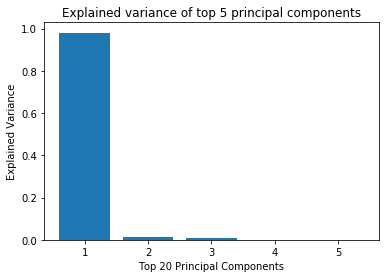

In [31]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 5 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [3],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [40],
    'criterion' :['gini']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(xpca, ytrain)

In [ ]:
xpca_test = pd.DataFrame(pca.fit_transform(xtest))

In [ ]:
ypred = CV_rfc.predict(xpca_test)

In [ ]:
cm_rf = confusion_matrix(ytest, ypred)
print(cm_rf)

Vamos a hacer un SVM con el PCA

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[10, 100], 'gamma':[0.01, 1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)
#cv indica la cantidad de folds
#refit nos permite ajustar la muestra al final con los mejores parametros encontrados 
clf.fit(xpca, ytrain)